In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel('D:\\Data Science\\Assignments\\Assignment 18 (Forecasting)\\CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
data.mean()

C:\Users\User\AppData\Local\Temp/ipykernel_1624/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Sales    2994.353308
dtype: float64

In [5]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
data.shape

(42, 2)

In [8]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
data.dtypes

Quarter     object
Sales      float64
dtype: object

In [10]:
data['Quarter'].unique()

array(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87',
       'Q4_87', 'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89',
       'Q3_89', 'Q4_89', 'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91',
       'Q2_91', 'Q3_91', 'Q4_91', 'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92',
       'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93', 'Q1_94', 'Q2_94', 'Q3_94',
       'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95', 'Q1_96', 'Q2_96'],
      dtype=object)

In [11]:
data['Sales'].unique()

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

In [12]:
data= data.set_index('Quarter')

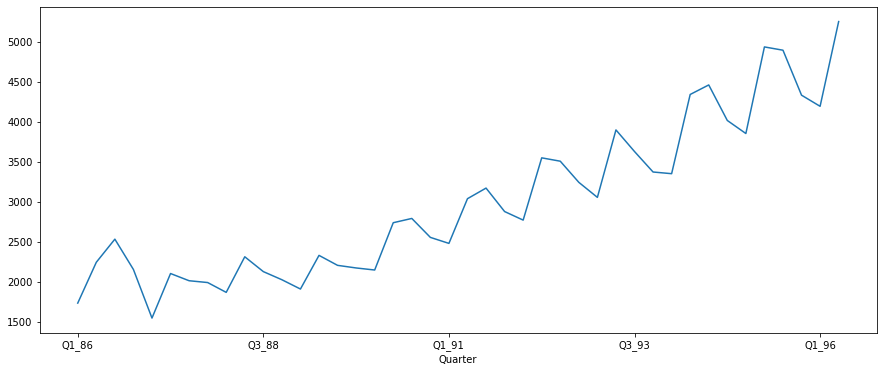

In [13]:
import matplotlib.pyplot as plt
data['Sales'].plot(figsize=(15, 6))
plt.show()

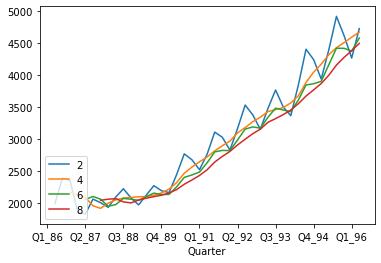

In [14]:
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

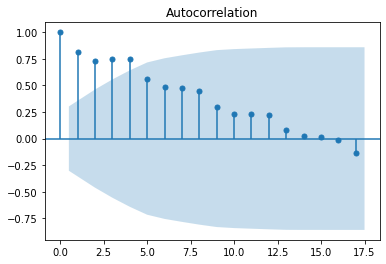

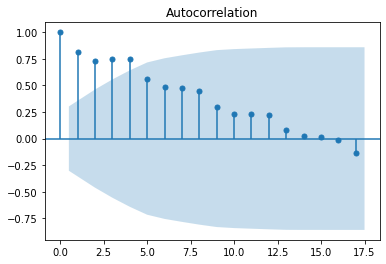

In [24]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

X = data['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Thu, 17 Mar 2022   AIC                            358.071
Time:                        07:58:23   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8434     26.509      1.578      0.114     -10.113      93.800
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

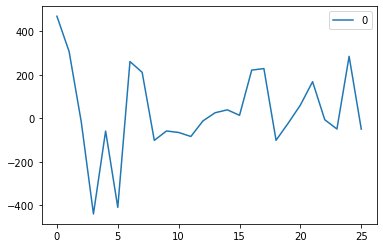

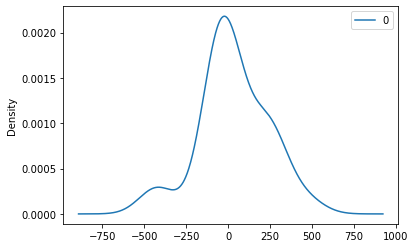

                0
count   26.000000
mean    31.325843
std    202.029748
min   -438.904683
25%    -58.602905
50%     -9.190426
75%    200.236452
max    468.290563


In [28]:
import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [29]:
history = [x for x in train]

In [30]:
predictions = list()

In [31]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=3135.586549, expected=3243.859993
predicted=3188.847481, expected=3056.000000
predicted=3734.223703, expected=3899.000000
predicted=3782.619360, expected=3629.000000
predicted=3355.125681, expected=3373.000000
predicted=3297.218056, expected=3352.000000
predicted=4112.815697, expected=4342.000000


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3956.255421, expected=4461.000000
predicted=4130.784009, expected=4017.000000
predicted=3912.792550, expected=3854.000000
predicted=4687.043899, expected=4936.000000
predicted=4970.518620, expected=4895.000000
predicted=4384.039133, expected=4333.000000


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=4229.064241, expected=4194.000000
predicted=5261.674213, expected=5253.000000


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 31915.341


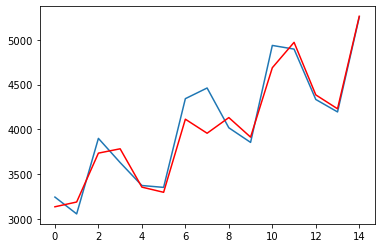

In [33]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()